##### This will be the import cell

In [0]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
import seaborn as sns
from keras.applications import VGG16
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Flatten, Input,MaxPool2D,Dropout,AveragePooling2D,GlobalAveragePooling2D,ZeroPadding2D
from keras.utils import to_categorical
from keras import optimizers
from keras.utils import np_utils
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from skimage.transform import resize
from scipy.misc import imshow

##### loading the dataset

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

##### Let's explore our data

In [0]:
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(20,10),preds=None,skip=0):
    fig,ax = plt.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='red',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='red',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    plt.show()
#plot_multiple_imgs(x_train,y_train,15,15,(20,15))

In [0]:
count = [0] * 10
for i in range(50000):
    count[y_train[i][0]]=count[y_train[i][0]]+1
print(count)

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


###build our first very naive CNN

In [0]:
model2 = Sequential()
model2.add(Conv2D(6,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model2.add(Conv2D(12,(3,3),padding='same',activation='relu'))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 6)         168       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 12)        660       
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 309,138
Trainable params: 309,138
Non-trainable params: 0
_________________________________________________________________


### **Data Augmantation**

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten, Input,MaxPool2D,Dropout,AveragePooling2D,GlobalAveragePooling2D,ZeroPadding2D
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch >= 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003       
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model2 = Sequential()
model2.add(Conv2D(6,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model2.add(BatchNormalization())
model2.add(Conv2D(12,(3,3),padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(24,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model2.add(BatchNormalization())
model2.add(Conv2D(48,(3,3),padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(96,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model2.add(BatchNormalization())
model2.add(Conv2D(150,(3,3),padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(2400,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1000,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))
model2.summary()

print(y_train.shape)

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 2000
 
opt_rms = keras.optimizers.rmsprop(lr=0.003,decay=1e-6)
model2.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=250,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 6)         168       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 6)         24        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 12)        660       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 12)        48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 12)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 24)        2616      
__________

ResourceExhaustedError: ignored

In [0]:
history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=300,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

NameError: ignored

### train and predict

10000/10000 [==============================] - 1s 125us/step
The Training error
0.06879999876022336
The Validation error
0.16260001659393308
The Test error
0.15549999999999997


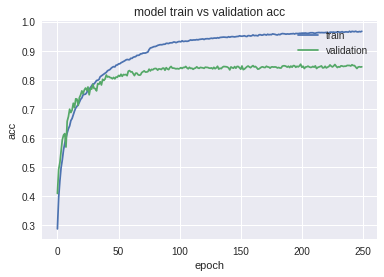

In [0]:
scores = model2.evaluate(x_test, y_test, batch_size=128, verbose=1)
print("The Training error")
print(1-history2.history['acc'][99])
print("The Validation error")
print(1-history2.history['val_acc'][99])
print("The Test error")
print(1-(scores[1]))
#print(history2.history)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model train vs validation acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

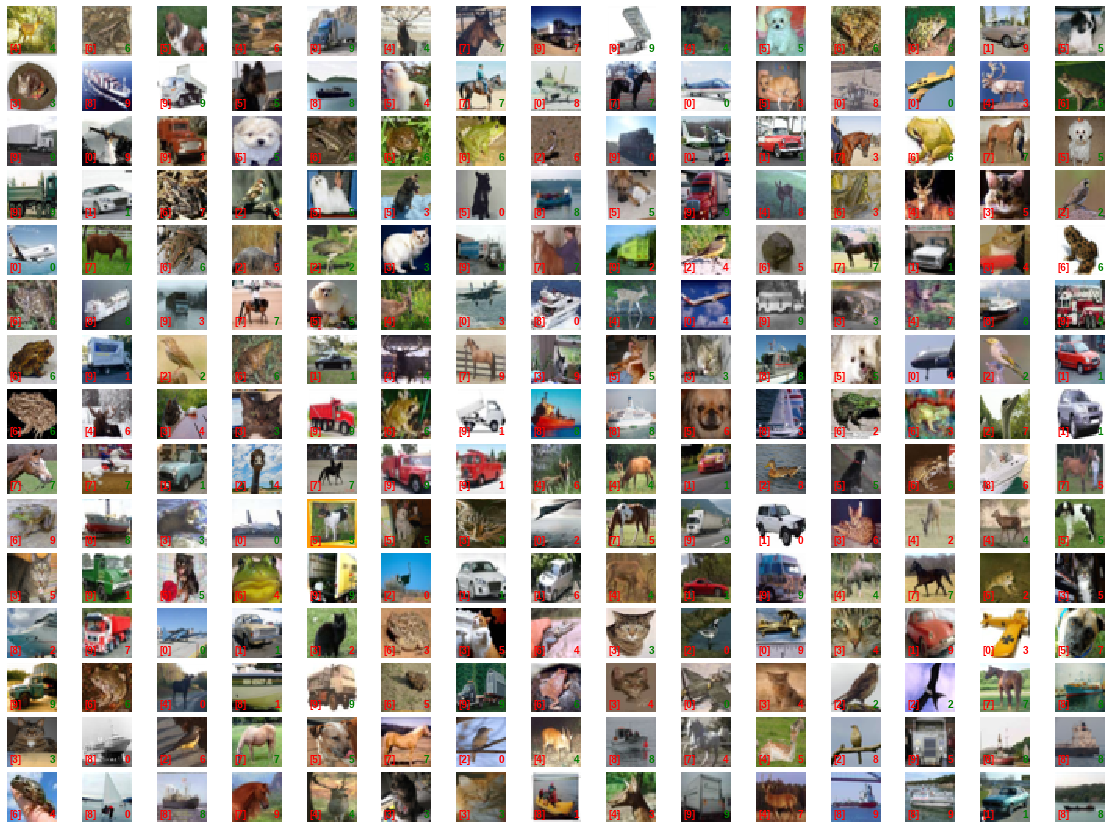

In [0]:
plot_multiple_imgs(x_test,y_test,15,15,(20,15),pred_cat2,skip=500)